# Loan Status Prediction:
This is a Property Loan Status Prediction dataset, we have the data of applicants who had previously applied for the loan based on the property and applicant-based metrics.The bank will decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, previous Credit History, Co-applicant Income, etc. The objective is to build a Machine Learning Model to predict the loan to be approved or to be rejected for an applicant.

#Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Connect to Google drive to access the dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')
# UPLOAD THE FILE
from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving test.csv to test.csv
Saving train.csv to train.csv


#Display only top 5 rows in the dataset

In [7]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
loan_data = pd.concat([train,test])
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Describe the data

In [8]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Information about the given loan dataset

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


# Loan Data preprocessing

In [10]:
# Finding the Null Values

loan_data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [27]:
# fill the missing values for numerical terms - median
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median())
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].median())


In [28]:
# fill the missing values for categorical terms - mode
loan_data['Gender'] = loan_data["Gender"].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data["Married"].fillna(loan_data['Married'].mode()[0])
loan_data['Dependents'] = loan_data["Dependents"].fillna(loan_data['Dependents'].mode()[0])
loan_data['Self_Employed'] = loan_data["Self_Employed"].fillna(loan_data['Self_Employed'].mode()[0])
loan_data['Loan_Status'] = loan_data['Loan_Status'].fillna(loan_data['Loan_Status'].mode()[0])

In [13]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Exploratory Data Analysis

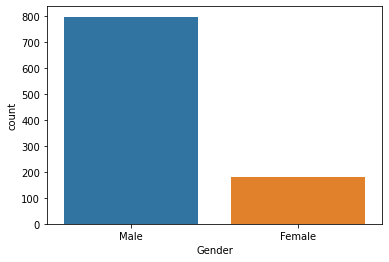

In [29]:
# categorical attributes visualization
sns.countplot(loan_data['Gender'])

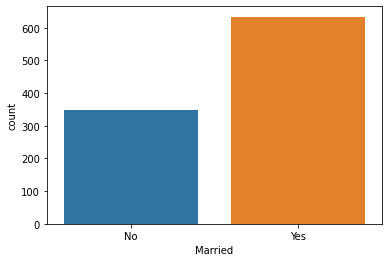

In [30]:
sns.countplot(loan_data['Married'])

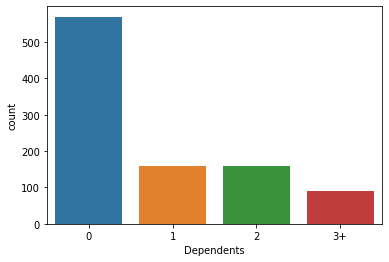

In [31]:
sns.countplot(loan_data['Dependents'])

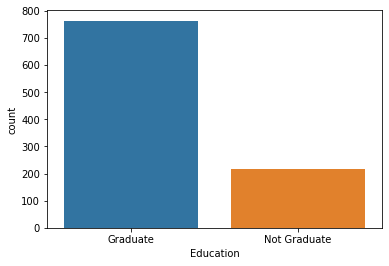

In [32]:
sns.countplot(loan_data['Education'])

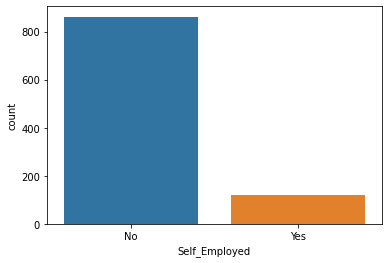

In [33]:
sns.countplot(loan_data['Self_Employed'])

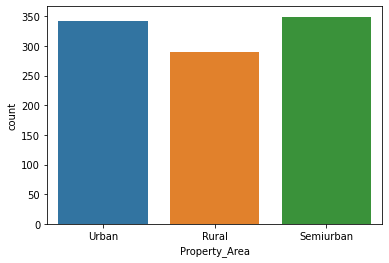

In [34]:
sns.countplot(loan_data['Property_Area'])

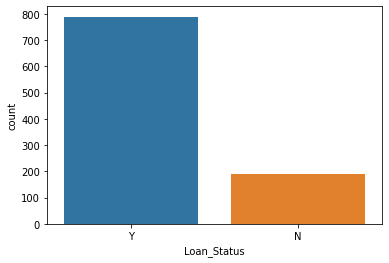

In [35]:
sns.countplot(loan_data['Loan_Status'])

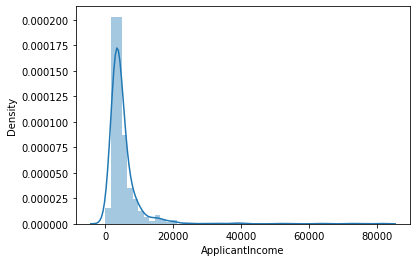

In [36]:
# numerical attributes visualization
sns.distplot(loan_data["ApplicantIncome"])

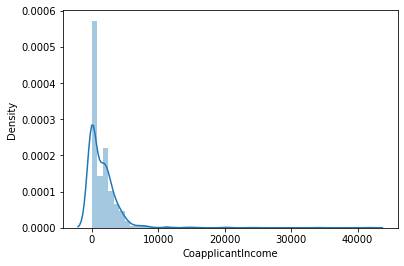

In [37]:

sns.distplot(loan_data["CoapplicantIncome"])

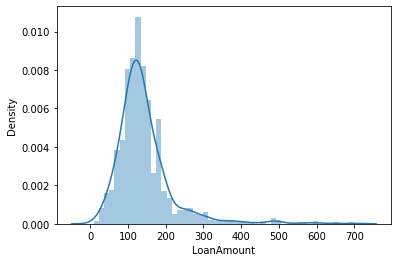

In [38]:

sns.distplot(loan_data["LoanAmount"])

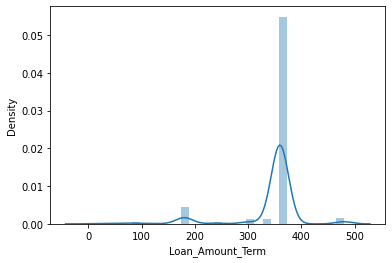

In [39]:

sns.distplot(loan_data['Loan_Amount_Term'])

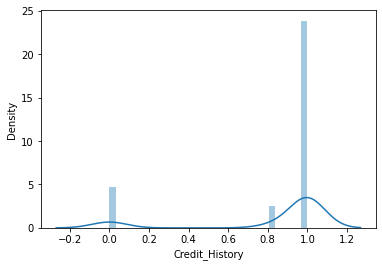

In [40]:

sns.distplot(loan_data['Credit_History'])

# New attribute creation

In [41]:
# total income
loan_data['Total_Income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,6000.0


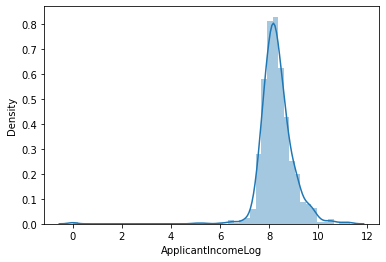

In [42]:
# apply log transformation to the attribute
loan_data['ApplicantIncomeLog'] = np.log(loan_data['ApplicantIncome']+1)
sns.distplot(loan_data["ApplicantIncomeLog"])

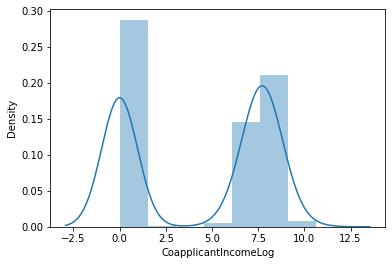

In [43]:
loan_data['CoapplicantIncomeLog'] = np.log(loan_data['CoapplicantIncome']+1)
sns.distplot(loan_data["CoapplicantIncomeLog"])

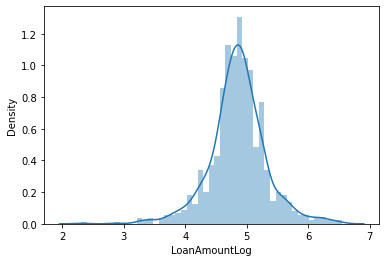

In [44]:
loan_data['LoanAmountLog'] = np.log(loan_data['LoanAmount']+1)
sns.distplot(loan_data["LoanAmountLog"])

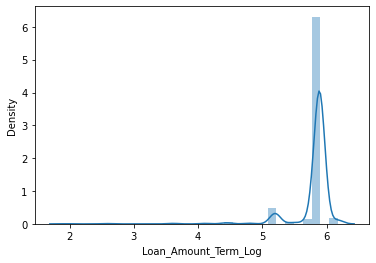

In [45]:
loan_data['Loan_Amount_Term_Log'] = np.log(loan_data['Loan_Amount_Term']+1)
sns.distplot(loan_data["Loan_Amount_Term_Log"])

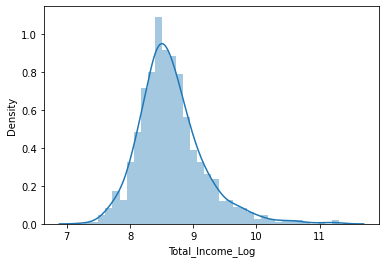

In [46]:

loan_data['Total_Income_Log'] = np.log(loan_data['Total_Income']+1)
sns.distplot(loan_data["Total_Income_Log"])

#Correlation Matrix

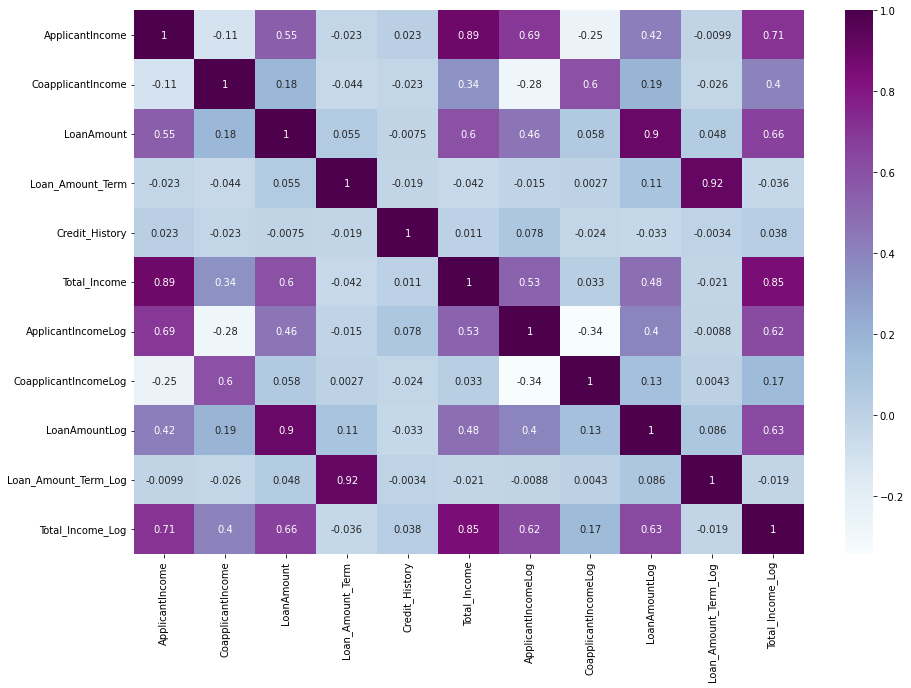

In [47]:
corr = loan_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [48]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.966415,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [49]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
loan_data = loan_data.drop(columns=cols, axis=1)
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.966415,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


# Label Encoding 

In [50]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    loan_data[col] = le.fit_transform(loan_data[col])

In [51]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.966415,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


# Train-Test Split

In [52]:
# specify input and output attributes
X = loan_data.drop(columns=['Loan_Status'], axis=1)
y = loan_data['Loan_Status']

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Training

In [54]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 82.52032520325203
Cross validation is 80.52677923961463


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 71.13821138211382
Cross validation is 73.59888117683622


# Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 82.52032520325203
Cross validation is 81.54925929762769


# Extra Tree Classifier

In [57]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 80.89430894308943
Cross validation is 80.32321558064851


# Hyperparameter Tuning

In [58]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=5)
classify(model, X, y)

Accuracy is 82.52032520325203
Cross validation is 81.24158292758729


# Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made

In [59]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [60]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 16,  34],
       [  7, 189]])

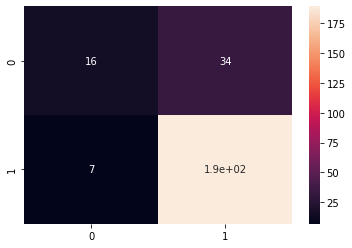

In [61]:
sns.heatmap(cm, annot=True)